# Machine Learning applied to Astroinformatics

# Load libraries

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Load data

Se utiliza un subconjunto del dataset original (para simplificar análisis, ya que el dataset es pesado (1GB cada subconjunto, teniendose 11 subconjuntos en total)).

El dataset original contiene 10.855.958 observaciones distribuidos en 18 clases diferentes. Se tiene la variable "object_id", la cual corresponde al id de un objeto astronómico. Agrupando las observaciones por "object_id", se puede obtener la curva de luz para ese objeto. 

Acá esta el código con el cual se obtuvieron los datos para aplicar cálculo de features, sin embargo, el dataset utilizado finalmente, corresponde a un subconjunto del dataset que se carga en el siguiente código. Las razones se explican mas adelante.

In [7]:
# import data

# Train data
raw_df = pd.read_csv("plasticc_dataset/training_set.csv")
# display data
display(raw_df.head())

# metadata
metadata_df = pd.read_csv("plasticc_dataset/training_set_metadata.csv")
# display data
display(metadata_df.head())

# merge data
df = raw_df.merge(metadata_df, on = "object_id")
# display data
display(df.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


In [8]:
# check dataset size
print("Shape of data to work: ", df.shape)

# check amount of different astronomycal objects
print("Unique targets: ", df.target.unique().shape[0])
print("targets: ", df.target.unique())

Shape of data to work:  (1421705, 17)
Unique targets:  14
targets:  [92 88 42 90 65 16 67 95 62 15 52  6 64 53]


### Ploting a light curve

,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


<IPython.core.display.Javascript object>


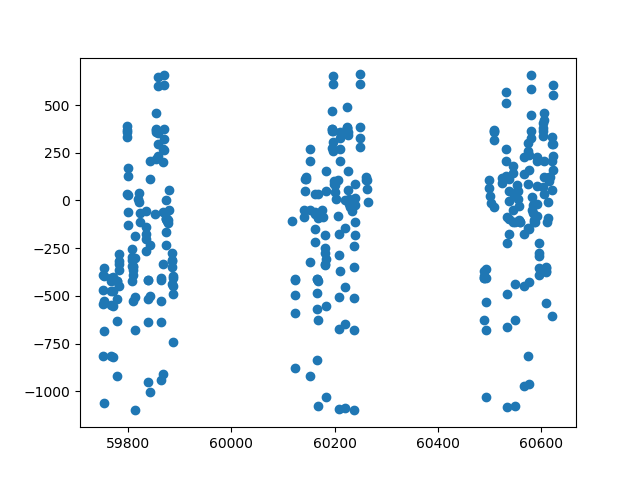

In [9]:
# get one light curve
one_ligth_curve = df[df["object_id"] == 615]

# display the light curve data
display(one_ligth_curve.head())

#plot light curve
fix, ax = plt.subplots()
ax.scatter(one_ligth_curve["mjd"], one_ligth_curve["flux"])

# Select variables with which we will work

In [11]:
# getting only useful features
light_curves = df[["object_id", "mjd", "passband", "flux", "flux_err", "target"]]

# display dataset
display(light_curves.head())

# light curve data frame shape
display(light_curves.shape)

,object_id,mjd,passband,flux,flux_err,target
0,615,59750.4229,2,-544.810303,3.622952,92
1,615,59750.4306,1,-816.434326,5.553370,92
2,615,59750.4383,3,-471.385529,3.801213,92
3,615,59750.4450,4,-388.984985,11.395031,92
4,615,59752.4070,2,-681.858887,4.041204,92


(1421705, 6)

# Feature extraction

Se extraen features desde cada una de las curvas de luz. Para esto se utiliza librería FATS (https://github.com/carpyncho/feets), la cual permite obtener un serie de features a partir de una curva de luz. Las features calculadas corresponden a diversos descriptores (desde estadísticos (tales como la varianza), hasta funciones complejas (tales como función de autocorrelación)).

Para simplificar análisis, se analiza únicamente 1 canal de la serie de tiempo (poseen 6 canales). Dada esta simplificación, las features que se calculan son listadas en la lista "features_names".

### Select features

In [63]:
# get all object_ids
object_ids = light_curves["object_id"].unique()

# print user message
print("objects di: ", object_ids.shape)

# set passband to analyze
passband = 0

# define features to work with them
# you can get from the documentation
features_names = ['Amplitude',
                  'AndersonDarling', 
#                   'Autocor_length', 
#                   'Beyond1Std', 
#                   'CAR_mean',
#                   'CAR_sigma', 
#                   'CAR_tau', 
#                   'Con', 
#                   'Eta_e', 
#                   'FluxPercentileRatioMid20',
#                  'FluxPercentileRatioMid35', 
#                   'FluxPercentileRatioMid50',
#                  'FluxPercentileRatioMid65' ,
#                   'FluxPercentileRatioMid80',
#                  'Freq1_harmonics_amplitude_0' ,
#                   'Freq1_harmonics_amplitude_1',
#                  'Freq1_harmonics_amplitude_2' ,
#                   'Freq1_harmonics_amplitude_3',
#                  'Freq1_harmonics_rel_phase_0' ,
#                   'Freq1_harmonics_rel_phase_1',
#                  'Freq1_harmonics_rel_phase_2' ,
#                   'Freq1_harmonics_rel_phase_3',
#                  'Freq2_harmonics_amplitude_0' ,
#                   'Freq2_harmonics_amplitude_1',
#                  'Freq2_harmonics_amplitude_2' ,
#                   'Freq2_harmonics_amplitude_3',
#                  'Freq2_harmonics_rel_phase_0' ,
#                   'Freq2_harmonics_rel_phase_1',
#                  'Freq2_harmonics_rel_phase_2' ,
#                   'Freq2_harmonics_rel_phase_3',
#                  'Freq3_harmonics_amplitude_0' ,
#                   'Freq3_harmonics_amplitude_1',
#                  'Freq3_harmonics_amplitude_2' ,
#                   'Freq3_harmonics_amplitude_3',
#                  'Freq3_harmonics_rel_phase_0' ,
#                   'Freq3_harmonics_rel_phase_1',
#                  'Freq3_harmonics_rel_phase_2' ,
#                   'Freq3_harmonics_rel_phase_3' ,
#                   'Gskew',
#                  'LinearTrend',
#                   'MaxSlope', 
                  'Mean', 
                  'Meanvariance', 
                  'MedianAbsDev', 
                  'MedianBRP',
#                  'PairSlopeTrend', 
#                   'PercentAmplitude',
#                   'PercentDifferenceFluxPercentile',
#                  'PeriodLS',
#                   'Period_fit',
#                   'Psi_CS', 
#                   'Psi_eta' ,
#                   'Q31', 
#                   'Rcs', 
                  'Skew',
#                  'SlottedA_length',
#                   'SmallKurtosis',
                  'Std',
#                   'StetsonK' ,
#                   'StetsonK_AC',
#                  'StructureFunction_index_21',
#                   'StructureFunction_index_31',
#                  'StructureFunction_index_32'
                 ]



objects di:  (7848,)


### Compute features (using feets library)

En el siguiente código, se calculan las features utilizando librería. Las features se calculan para objeto astrónimco.

In [64]:
from tqdm import tqdm_notebook
import feets.preprocess

# array of features values
# shape: ( num objects id, num features )
# for each object we'll have one column for each feature
features_values = np.zeros((len(object_ids), len(features_names)))

# array to store the targets (classes)
# each object ID has a unique class
# shape: ( num object_ids )
targets = np.zeros(len(object_ids))

# iterate through each object id (light curve)
# tqdm_notebook is a library to take time in for loop (you can delete it and the code will work well)
for index, object_id in enumerate(tqdm_notebook(object_ids)):
    
    # Getting each ligth curve
    
    # create a mask to get the object
    mask1 = light_curves["object_id"] == object_id
    
    # create a mask to get the bandwith
    mask2 = light_curves["passband"] == passband
    
    # get the light curve (specific object id and passband)
    lc = light_curves[(mask1 & mask2)]
    
    # in order to get the features, it requires the date, flux (bright) and flux error
    lc_data = [lc.mjd, lc.flux, lc.flux_err]
    
    # feature extraction
    fs = feets.FeatureSpace(only = features_names, data = ["time", "magnitude", "error"])

    # compute the features
    features, values = fs.extract(*lc_data)
    
    # add features to features values arrays
    features_values[index, :] = values
    
    # get target of object
    targets[index] = lc.iloc[0, -1]

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

In [65]:
# check arrays
display(features_values.shape)
display(type(features_values))

# check arrays
display(targets.shape)
display(type(targets))

(7848, 8)

numpy.ndarray

(7848,)

numpy.ndarray

As you can see, the arrays are numpy type, so in order to work with them, we are going to transform it in pandas dataframe

### Build dataframe from computed features

Debido a que proceso de cálculo de features es extenso en tiempo, cada vez que se analizaban diferentes combinaciones de clases (para analizar desbalance), se almacenaban las features obtenidas en un nuevo dataset.

In [66]:
# concatenate the feautres and targets of objects
features_values_with_targets = np.c_[object_ids, features_values, targets]

# check the shape
print(features_values_with_targets.shape)

# add target to column names (for columns names)
columns = ["object_id"] + features_names + ["target"]
print(columns)

# create new dataframe
features_light_curves = pd.DataFrame(data = features_values_with_targets,    # values
#                                       index = object_ids,    # 1st column as index
                                      columns = columns
                                    )

# display new dataframe
display(features_light_curves.head())
print("features light curves shape: ",features_light_curves.shape )

(7848, 10)
['object_id', 'Amplitude', 'AndersonDarling', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'Skew', 'Std', 'target']


,object_id,Amplitude,AndersonDarling,Mean,Meanvariance,MedianAbsDev,MedianBRP,Skew,Std,target
0,615.0,117.660498,1.000000,-3.254554,-25.587479,79.958667,0.158730,0.125827,83.275842,92.0
1,713.0,11.347079,0.999936,-2.720398,-2.596133,6.054598,0.200000,0.254446,7.062516,88.0
2,730.0,3.302110,0.362424,-0.048080,-37.772702,1.205846,0.347222,0.349431,1.816127,42.0
3,745.0,9.511895,1.000000,1.797523,2.416637,1.720855,0.583333,1.980815,4.343961,90.0
4,1124.0,4.585307,0.538771,0.660948,3.542304,1.365366,0.428571,-0.324207,2.341279,90.0


features light curves shape:  (7848, 10)


<IPython.core.display.Javascript object>


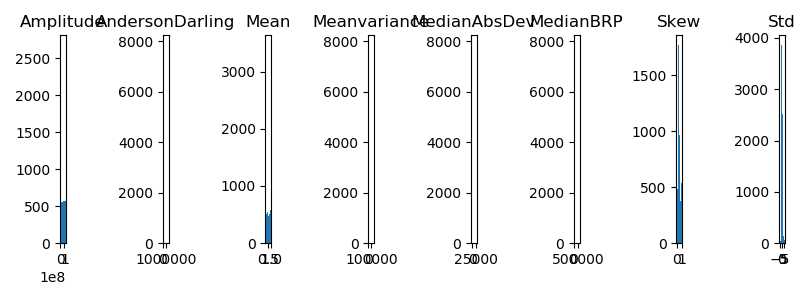

In [70]:
# create plot
fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))

# iterate through each feature
for i, f in enumerate(range(0, len(features_names))):

    #add histogram of feature
    ax[i].hist(features_light_curves.iloc[:, f])
    
    # add title
    ax[i].set_title(features_names[f])

# Supervised classification logistic regressor

In [71]:
# Format data

# Get the independt variables
X = features_light_curves.loc[:, ["Amplitude", "AndersonDarling"]]

# Get the predictor (or dependent variable)
y = features_light_curves.loc[:, ["target"]]

print(X.shape)
print(y.shape)

(7848, 2)
(7848, 1)


In [72]:
# Train LR
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# define model to train
logistic_regression = LogisticRegression(
    max_iter = 10000, 
    multi_class = "auto", 
#     solver = "lbfgs", 
#     random_state=0
)

# train the model
logistic_regression.fit(X, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# the more close to 1 is, the better the model fit the data
f1_score(y,logistic_regression.predict(X), average = "weighted")

0.15389982720948575

# Dimensionality reduction PCA (Unsupervised learning)

Para analisis posterior, se obtienen igual número de PC que número de features obtenidas.

In [83]:
# import library 
from sklearn.decomposition import PCA

# define number of latent variables
n_latent_variables = 2

# define PCA model
pca = PCA(n_components = n_latent_variables)

# get PCA 
principalComponents = pca.fit_transform(features_light_curves)

# converting to DF
pca_df = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
                     )

# add target to DF
pca_df["target"] = features_light_curves["target"].values

# display dataframe
display(pca_df.head())

,0,1,target
0,-4.810313e+07,236.935743,92.0
1,-4.810303e+07,91.464308,88.0
2,-4.810302e+07,81.141758,42.0
3,-4.810300e+07,87.783847,90.0
4,-4.810262e+07,82.556319,90.0


<IPython.core.display.Javascript object>


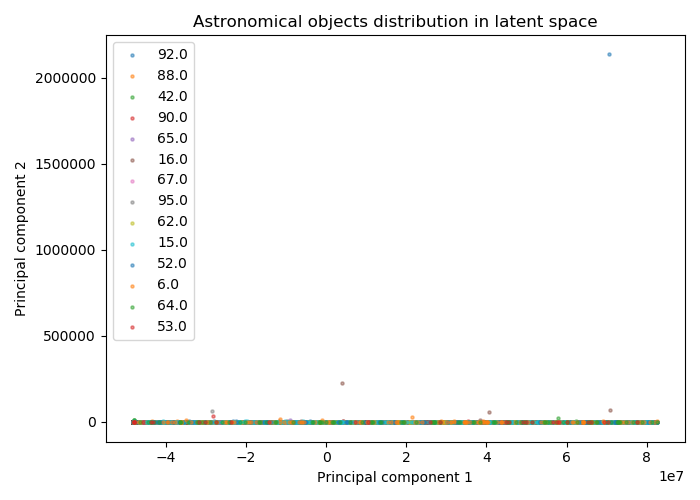

In [84]:
# plotting data projection with PCA
fig, ax  = plt.subplots(figsize = (7,5), tight_layout = True)

# iterate through each class
for label in pca_df.target.unique():
    
    # scatte plot (principal components)
    ax.scatter(pca_df.loc[pca_df.target == label, 0], pca_df.loc[pca_df.target == label, 1], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
        
    # set titles
    ax.set_xlabel("Principal component 1")
    ax.set_ylabel("Principal component 2")
    ax.set_title("Astronomical objects distribution in latent space")
    
# add legend to plot
plt.legend()    

# Supervised classification with Logistic Regressor using PCA

Para analizar el efecto del número de variables latentes sobre la clasificaición, se entrena un regresor logístico para cada subconjunto de variables latentes. Luego, se obtiene accuracy y F1 score sobre el conjunto de testing.

In [85]:
# Train LR
from sklearn.linear_model import LogisticRegression

# define model to train
logistic_regression = LogisticRegression(
    max_iter = 10000, 
    multi_class = "auto", 
#     solver = "lbfgs", 
#     random_state=0
)

# train the model
logistic_regression.fit(principalComponents, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
from sklearn.metrics import f1_score

# the more close to 1 is, the better the model fit the data
f1_score(y,logistic_regression.predict(principalComponents), average = "weighted")

0.13320321161054563